✅ Dataset loaded successfully!

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150

C:\Users\PC\AppData\Local\Temp\ipykernel_6716\1056196010.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby("species").mean()


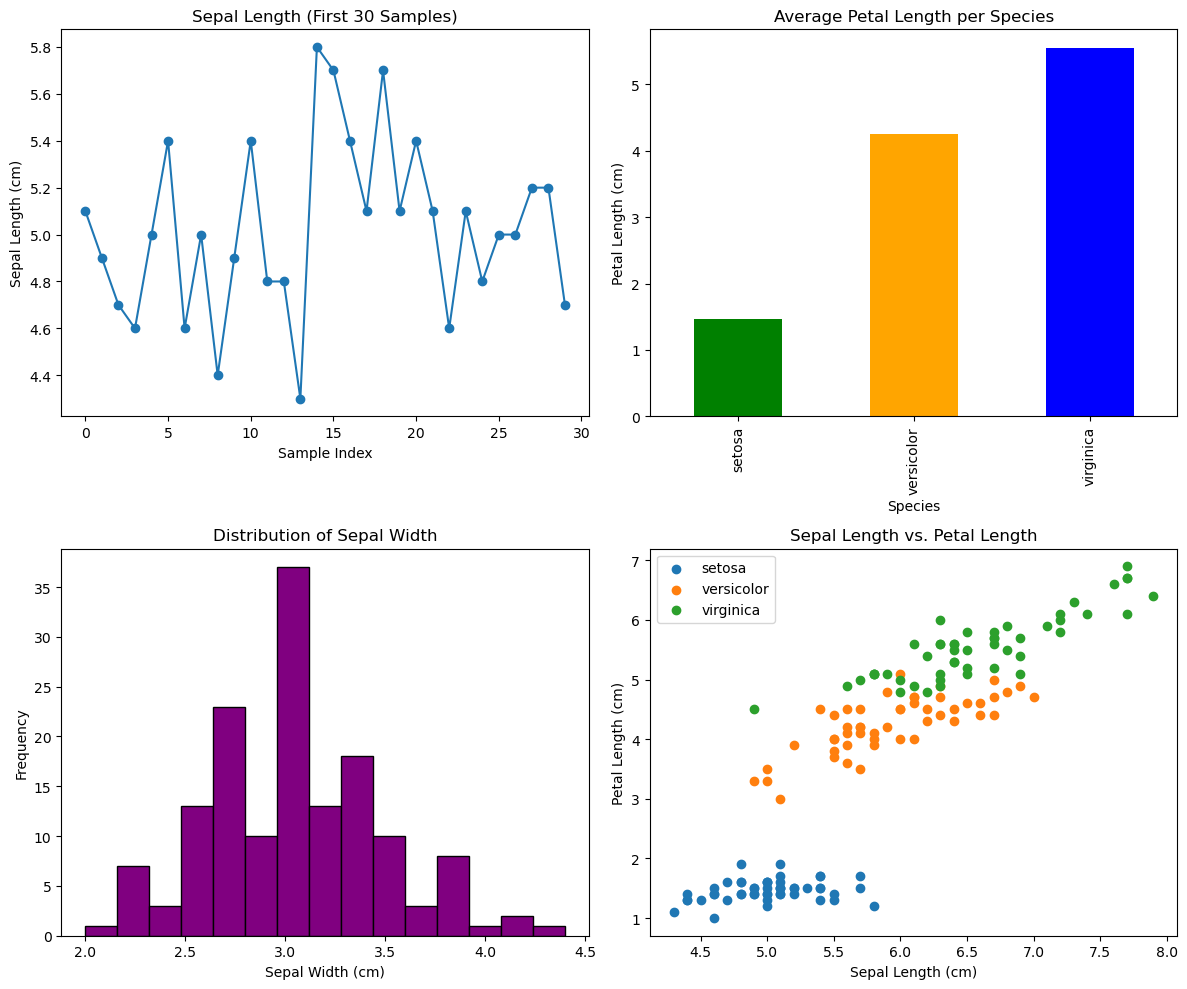

In [4]:
# Analyzing Data with Pandas and Visualizing Results with Matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# ---------------------------
# Task 1: Load and Explore Dataset
# ---------------------------

try:
    # Load Iris dataset from sklearn
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("⚠ Error: File not found. Please check the dataset path.")
except Exception as e:
    print(f"⚠ Unexpected error: {e}")

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head(), "\n")

# Dataset info
print("Dataset Info:")
print(df.info(), "\n")

# Check missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# ---------------------------
# Task 2: Basic Data Analysis
# ---------------------------

# Summary statistics
print("Summary Statistics:")
print(df.describe(), "\n")

# Group by species, compute mean
print("Average measurements per species:")
species_means = df.groupby("species").mean()
print(species_means, "\n")

# Finding observation
print("Observation: Iris-setosa generally has smaller petal length/width, "
      "while Iris-virginica has the largest values.")

# ---------------------------
# Task 3: Data Visualization
# ---------------------------

plt.figure(figsize=(12, 10))

# 1. Line chart - Sepal length of first 30 samples
plt.subplot(2, 2, 1)
plt.plot(df['sepal length (cm)'][:30], marker='o', linestyle='-')
plt.title("Sepal Length (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")

# 2. Bar chart - Average petal length per species
plt.subplot(2, 2, 2)
species_means['petal length (cm)'].plot(kind='bar', color=['green', 'orange', 'blue'])
plt.title("Average Petal Length per Species")
plt.ylabel("Petal Length (cm)")
plt.xlabel("Species")

# 3. Histogram - Sepal width distribution
plt.subplot(2, 2, 3)
plt.hist(df['sepal width (cm)'], bins=15, color='purple', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")

# 4. Scatter plot - Sepal length vs Petal length
plt.subplot(2, 2, 4)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=species)
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()

plt.tight_layout()
plt.show()
